<a href="https://colab.research.google.com/github/fabiocceruti/Analise_Violencia_Rio_de_Janeiro/blob/main/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Data Science na Prática**
*by Fabio Ceruti*


# Analisando a Violência no Rio de Janeiro

![](https://res.cloudinary.com/zaply/image/upload/c_scale,dpr_auto,f_auto,q_auto,w_auto/v1/blog-images/rio-de-janeiro.jpg)

O Rio de Janeiro é considerado como um dos estados mais violentos do Brasil, representando cerca de 8% do total de crimes violentos no país e tendo uma média de 21,2 ocorrências por 100 mil habitantes em 2020, acima do estado brasileiro. Para mais informações, consultar o [Monitor de Violência](http://especiais.g1.globo.com/monitor-da-violencia/2018/mortes-violentas-no-brasil/?_ga=2.140202739.1191599439.1613936354-1442002909.1613936354).

Por isso, o instituto de segurança pública ([ISP](https://www.isp.rj.gov.br:4431/Default.asp)) foi criado em 1999 pela Lei 3.329 com intuito subsidar as políticas públicas de segurança através da disponibilização de informações e análises. 

Diante dessas informações, o objetivo desta análise é avaliar os dados relacionados com a violência no estado do Rio de Janeiro.

## Obtenção dos Dados

O *dataset* utilizado para esta análise foi obtido a partir do site do [ISP](https://www.ispdados.rj.gov.br:4432/estatistica.html), através da base de dados **"série histórica mensal no estado desde 01/1991"**.

Os dados estão estruturados de forma histórica (ano e mês) com valores totais para cada tipo de crime registrado. É importante ressaltar que alguns crimes passaram a ser registrado a partir de anos específicos e algumas variáveis são o produto do somatório de um conjunto de colunas, conforme detalhamento do [dicionário](https://www.ispdados.rj.gov.br:4432/Notas.html) disponibilizado pelo ISP. 

Para facilitar a compreensão a respeito do *dataset*, o dicionário das variáveis bem como a sua forma de contagem pode ser encontrada na tabela abaixo.

|Variável|Descrição|Contagem por|
|--------|---------|--------|
|ano|Ano da comunicação da ocorrência| - |
|mes|Mês da comunicação da ocorrência| - |
|fase|2 - Consolidado sem errata    3 - Consolidado com errata| - |
|hom_doloso|Homicídio doloso|vítima|
|lesao_corp_morte|Lesão corporal seguida de morte|vítima|
|latrocinio|Latrocínio (roubo seguido de morte)|vítima|
|cvli|Crimes violentos letais intencionais|vítima|
|hom_por_interv_policial|Morte por intervenção de agente do Estado|vítima|
|letalidade_violenta|Letalidade violenta|vítima|
|tentat_hom|Tentativa de homicídio|vítima|
|lesao_corp_dolosa|Lesão corporal dolosa|vítima|
|estupro|Estupro|vítima|
|hom_culposo|Homicídio culposo (trânsito)|vítima|
|lesao_corp_culposa|Lesão corporal culposa (trânsito)|vítima|
|roubo_transeunte|Roubo a transeunte|caso|
|roubo_celular|Roubo de telefone celular|caso|
|roubo_em_coletivo|Roubo em coletivo|caso|
|roubo_rua|Roubo de rua|caso|
|roubo_veiculo|Roubo de veículo|caso|
|roubo_carga|Roubo de carga|caso|
|roubo_comercio|Roubo a estabelecimento comercial|caso|
|roubo_residencia|Roubo a residência|caso|
|roubo_banco|Roubo a banco|caso|
|roubo_cx_eletronico|Roubo de caixa eletrônico|caso|
|roubo_conducao_saque|Roubo com condução da vítima para saque em instituição financeira|caso|
|roubo_apos_saque|Roubo após saque em instituição financeira|caso|
|roubo_bicicleta|Roubo de bicicleta|caso|
|outros_roubos|Outros roubos que não os listados acima|caso|
|total_roubos|Total de roubos|caso|
|furto_veiculos|Furto de veículo|caso|
|furto_transeunte|Furto a transeunte|caso|
|furto_coletivo|Furto em coletivo|caso|
|furto_celular|Furto de telefone celular|caso|
|furto_bicicleta|Furto de bicicleta|caso|
|outros_furtos|Outros furtos que não os listados acima|caso|
|total_furtos|Total de furtos|caso|
|sequestro|Extorsão mediante sequestro (sequestro clássico)|vítima|
|extorsao|Extorsão|caso|
|sequestro_relampago|Extorsão com momentânea privação da liberdade (sequestro relâmpago)|vítima|
|estelionato|Estelionato|caso|
|apreensao_drogas|Apreensão de drogas|caso|
|posse_drogas|Número de registros que possuem algum título referente a posse de drogas|caso|
|trafico_drogas|Número de registros que possuem algum título referente a tráfico de drogas|caso|
|apreensao_drogas_sem_autor|Número de registros que possuem algum título referente a apreensão de drogas sem autor|caso|
|recuperacao_veiculos|Recuperação de veículo|caso|
|apf|Auto de Prisão em Flagrante|autor|
|aaapai|Auto de Apreensão de Adolescente por Prática de Ato Infracional|adolescente infrator|
|cmp|Cumprimento de Mandado de Prisão|autor|
|cmba|Cumprimento de Mandado de Busca e Apreensão|adolescente infrator|
|ameaca|Ameaça|vítima|
|pessoas_desaparecidas|Pessoas desaparecidas|vítima|
|encontro_cadaver|Encontro de cadáver|vítima|
|encontro_ossada|Encontro de ossada|vítima|
|pol_militares_mortos_serv|Policiais Militares mortos em serviço|vítima|
|pol_civis_mortos_serv|Policiais Civis mortos em serviço|vítima|
|registro_ocorrencias|Registro de ocorrências|caso|


### Importando os dados

Antes de inciar a análise, devemos importar as seguintes bibliotecas do python para nos ajudar no processo:

* **Pandas** - biblioteca responsável pela manipulação dos dados;
* **Matplotlib e Seaborn** - biblioteca respnsável pela visualização dos dados.


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Vamos importar o *dataset* para começarmos a executar a análise exploratória dos dados.

In [44]:
#Obtendo os dados pelo caminho do github
df = pd.read_csv("https://raw.githubusercontent.com/fabiocceruti/Analise_Violencia_Rio_de_Janeiro/main/dataset/DOMensalEstadoDesde1991.csv", sep = ";")

## Análise Inicial dos Dados

Vamos avaliar como está estruturado os dados do *dataset*. O objetivo desta etapa é entender como estão distribuídos os dados e encontrar possíveis anomalias que necessitem de correção.

Primeiramente vamos avaliar a dimensão da base de dados.


In [5]:
#Imprimindo a quantidade de entrada e variável
print("Quantidade de entradas: ", df.shape[0])
print("Quantidade de variáveis: ", df.shape[1])

Quantidade de entradas:  360
Quantidade de variáveis:  56


Vamos extrair os nomes das colunas do *dataset*, lembrando que o dicionário apresentado na seção **obtenção de dados** contém o significado de cada variável.

In [6]:
#Verificando os nomes das colunas
df.columns

Index(['ano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio', 'cvli',
       'hom_por_interv_policial', 'letalidade_violenta', 'tentat_hom',
       'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa',
       'roubo_transeunte', 'roubo_celular', 'roubo_em_coletivo', 'roubo_rua',
       'roubo_veiculo', 'roubo_carga', 'roubo_comercio', 'roubo_residencia',
       'roubo_banco', 'roubo_cx_eletronico', 'roubo_conducao_saque',
       'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos', 'total_roubos',
       'furto_veiculos', 'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_

Nosso próximo passo será de identificar o tipo de cada variável. Este passo é importante para verificar a necessidade de realizar alguma conversão de tipo de dado.

In [7]:
#Verificando os tipos das variáveis
df.dtypes

ano                            int64
mes                            int64
hom_doloso                     int64
lesao_corp_morte              object
latrocinio                     int64
cvli                          object
hom_por_interv_policial       object
letalidade_violenta            int64
tentat_hom                     int64
lesao_corp_dolosa              int64
estupro                       object
hom_culposo                   object
lesao_corp_culposa            object
roubo_transeunte               int64
roubo_celular                 object
roubo_em_coletivo              int64
roubo_rua                      int64
roubo_veiculo                  int64
roubo_carga                    int64
roubo_comercio                 int64
roubo_residencia               int64
roubo_banco                    int64
roubo_cx_eletronico           object
roubo_conducao_saque          object
roubo_apos_saque              object
roubo_bicicleta               object
outros_roubos                  int64
t

De acordo com a última etapa, podemos observar que existem variáveis de dois tipos de dados:
* **Int64** - número inteiro;
* **Object** - texto.

O fato interessante é que as variáveis que são numéricas vieram como texto e precisaremos investigar mais a fundo a respeito desta anomalia.

Então, o próximo passo é avaliarmos as 5 primeiras linhas e as 5 últimas linhas.

In [8]:
#Avaliando as 5 primeiras linhas
df.head()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1991,1,657,,15,,,672,162,3051,,,,967,,381,1348,1174,63,350,188,37,,,,,158,3318,2009,1147,,,,3561,6717,,,,,133,,,,872,,,,,,,217,,,,,3
1,1991,2,732,,17,,,749,175,3421,,,,963,,432,1395,1097,64,357,171,35,,,,,142,3261,1850,1066,,,,3309,6225,,,,,127,,,,751,,,,,,,209,,,,,3
2,1991,3,713,,25,,,738,216,3613,,,,963,,422,1385,1265,71,443,191,43,,,,,131,3529,2084,1062,,,,3573,6719,,,,,80,,,,789,,,,,,,188,,,,,3
3,1991,4,634,,20,,,654,200,3211,,,,1186,,354,1540,1415,81,425,199,36,,,,,112,3808,2085,1195,,,,3290,6570,,,,,133,,,,787,,,,,,,140,,,,,3
4,1991,5,650,,20,,,670,146,3051,,,,931,,335,1266,1449,82,553,231,27,,,,,147,3755,2185,723,,,,3546,6454,,,,,163,,,,845,,,,,,,78,,,,,3


In [9]:
#Avaliando as 5 últimas linhas
df.tail()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
355,2020,8,261,2,12,275,51,326,354,4213,459,162,1702,3481,1252,659,5392,1791,415,243,42,2,5,4,74,15,1190,9173,1107,702,343,746,129,5755,8782,0,118,3,4592,2050,1009,917,172,1283,2915,343,1512,35,4102,275,29,4,0,2,50348,3
356,2020,9,239,3,7,249,54,303,343,4560,481,171,1675,3567,1319,582,5468,1742,323,294,61,0,4,2,57,27,1146,9124,1065,698,379,823,132,5888,8985,1,105,5,4086,1984,974,890,150,1173,2497,455,1059,37,4094,297,22,1,0,0,48732,3
357,2020,10,274,2,5,281,145,426,405,4602,452,168,1841,3971,1283,768,6022,1899,358,289,49,0,0,6,51,15,1239,9928,1058,813,431,1005,157,5864,9328,0,105,11,4593,2019,972,910,173,1212,2787,369,993,37,4194,297,24,4,2,0,50772,2
358,2020,11,324,2,8,334,80,414,400,4620,467,173,1780,3763,1301,707,5771,2083,331,273,71,1,2,7,64,12,1294,9909,1052,837,395,1017,148,5402,8851,1,107,7,3723,1738,803,820,147,1273,2629,381,642,37,4055,316,19,3,1,1,47940,2
359,2020,12,279,2,8,289,79,368,322,4672,424,186,1656,3544,1273,715,5532,2300,459,324,75,0,4,6,68,24,1368,10160,1111,807,318,1018,157,5508,8919,0,112,5,3541,1709,784,827,133,1190,2673,360,906,40,4116,308,20,0,1,1,47842,2


Podemos correlacionar que as variáveis classificadas como **object** possuem valores ausentes, conforme as 5 primeiras linhas. Por padrão, a biblioteca pandas reconheceria as entradas vazias e as classificaria como tipo float. Porém, algumas entradas foram preenchidas com **espaço**, confundindo a conversão para o dataframe.

Portanto, o próximo passo é converter para valor numérico estas variáveis e imprimir novamente as 5 primeiras linhas.

In [45]:
#Criando uma variável com as colunas a serem modificadas.
Lista_Variaveis = [
                   'lesao_corp_morte',
                   'cvli',
                   'hom_por_interv_policial',
                   'estupro',
                   'hom_culposo',
                   'lesao_corp_culposa',
                   'roubo_celular',
                   'roubo_cx_eletronico',
                   'roubo_conducao_saque', 
                   'roubo_apos_saque', 
                   'roubo_bicicleta', 
                   'furto_coletivo', 
                   'furto_celular', 
                   'furto_bicicleta', 
                   'sequestro', 
                   'extorsao',
                   'sequestro_relampago',
                   'estelionato',
                   'posse_drogas',
                   'trafico_drogas',
                   'apreensao_drogas_sem_autor',
                   'apf',
                   'aaapai',
                   'cmp',
                   'cmba',
                   'ameaca',
                   'pessoas_desaparecidas',
                   'encontro_ossada',
                   'pol_militares_mortos_serv',
                   'pol_civis_mortos_serv',
                   'registro_ocorrencias'
                   ]

#Criando um loop para converter cada variável em tipo numérico
for variavel in Lista_Variaveis:

  #Aplicando a função do pandas para converter em valor numérico
  #Errors = Coerce -> Transforma qualquer string (espaço) em NaN
  df[variavel] = pd.to_numeric(df[variavel],errors='coerce')

In [46]:
#Imprimindo as 5 primeira slinhas do dataframe
df.head()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,NaN,672,162,3051,NaN,NaN,NaN,967,NaN,381,1348,1174,63,350,188,37,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,NaN,3
1,1991,2,732,NaN,17,NaN,NaN,749,175,3421,NaN,NaN,NaN,963,NaN,432,1395,1097,64,357,171,35,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,NaN,3
2,1991,3,713,NaN,25,NaN,NaN,738,216,3613,NaN,NaN,NaN,963,NaN,422,1385,1265,71,443,191,43,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,NaN,3
3,1991,4,634,NaN,20,NaN,NaN,654,200,3211,NaN,NaN,NaN,1186,NaN,354,1540,1415,81,425,199,36,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,NaN,3
4,1991,5,650,NaN,20,NaN,NaN,670,146,3051,NaN,NaN,NaN,931,NaN,335,1266,1449,82,553,231,27,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,3


Vamos avaliar as 5 últimas linhas para verificar se os dados estão corretos.

In [47]:
#Imprimindo as 5 últimas linhdas do dataframe
df.tail()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
355,2020,8,261,2.0,12,275.0,51.0,326,354,4213,459.0,162.0,1702.0,3481,1252.0,659,5392,1791,415,243,42,2,5.0,4.0,74.0,15.0,1190,9173,1107,702,343.0,746.0,129.0,5755,8782,0.0,118.0,3.0,4592.0,2050,1009.0,917.0,172.0,1283,2915.0,343.0,1512.0,35.0,4102.0,275.0,29,4.0,0.0,2.0,50348.0,3
356,2020,9,239,3.0,7,249.0,54.0,303,343,4560,481.0,171.0,1675.0,3567,1319.0,582,5468,1742,323,294,61,0,4.0,2.0,57.0,27.0,1146,9124,1065,698,379.0,823.0,132.0,5888,8985,1.0,105.0,5.0,4086.0,1984,974.0,890.0,150.0,1173,2497.0,455.0,1059.0,37.0,4094.0,297.0,22,1.0,0.0,0.0,48732.0,3
357,2020,10,274,2.0,5,281.0,145.0,426,405,4602,452.0,168.0,1841.0,3971,1283.0,768,6022,1899,358,289,49,0,0.0,6.0,51.0,15.0,1239,9928,1058,813,431.0,1005.0,157.0,5864,9328,0.0,105.0,11.0,4593.0,2019,972.0,910.0,173.0,1212,2787.0,369.0,993.0,37.0,4194.0,297.0,24,4.0,2.0,0.0,50772.0,2
358,2020,11,324,2.0,8,334.0,80.0,414,400,4620,467.0,173.0,1780.0,3763,1301.0,707,5771,2083,331,273,71,1,2.0,7.0,64.0,12.0,1294,9909,1052,837,395.0,1017.0,148.0,5402,8851,1.0,107.0,7.0,3723.0,1738,803.0,820.0,147.0,1273,2629.0,381.0,642.0,37.0,4055.0,316.0,19,3.0,1.0,1.0,47940.0,2
359,2020,12,279,2.0,8,289.0,79.0,368,322,4672,424.0,186.0,1656.0,3544,1273.0,715,5532,2300,459,324,75,0,4.0,6.0,68.0,24.0,1368,10160,1111,807,318.0,1018.0,157.0,5508,8919,0.0,112.0,5.0,3541.0,1709,784.0,827.0,133.0,1190,2673.0,360.0,906.0,40.0,4116.0,308.0,20,0.0,1.0,1.0,47842.0,2


Agora, depois da conversão das colunas de string para valor numérico, vamos reavaliar os tipos para cada coluna.

In [48]:
#Imprimindo os tipos por colunas
df.dtypes

ano                             int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
cvli                          float64
hom_por_interv_policial       float64
letalidade_violenta             int64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_transeunte                int64
roubo_celular                 float64
roubo_em_coletivo               int64
roubo_rua                       int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_comercio                  int64
roubo_residencia                int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubo

Podemos notar que não existe mais variável do tipo **object** e foram convertidas para o tipo **float** (número com casa decimal). Por padrão, o pandas considera as colunas que possuem **NaN** do tipo float, quando estas forem numéricas.

O próximo passo é calcular o percentual de valores ausentes para cada variável.

In [66]:
#Calculando a quantidade de valores ausentes
round((((df.isnull().sum()).sort_values(ascending = False)) / df.shape[0])*100,2)

furto_bicicleta               76.67
roubo_bicicleta               76.67
posse_drogas                  50.00
cmba                          50.00
cmp                           50.00
aaapai                        50.00
apf                           50.00
apreensao_drogas_sem_autor    50.00
trafico_drogas                50.00
roubo_cx_eletronico           40.00
roubo_apos_saque              40.00
extorsao                      40.00
sequestro_relampago           40.00
estelionato                   40.00
roubo_conducao_saque          40.00
furto_celular                 40.00
furto_coletivo                40.00
estupro                       40.00
pol_militares_mortos_serv     40.00
pol_civis_mortos_serv         40.00
pessoas_desaparecidas         36.67
encontro_ossada               36.67
roubo_celular                 30.00
lesao_corp_culposa            26.67
registro_ocorrencias          26.67
sequestro                     26.67
cvli                          26.67
lesao_corp_morte            

O percentual de valores ausentes está atrelada ao ano que estas variáveis passaram a ser registradas, segundo o [dicionário](https://www.ispdados.rj.gov.br:4432/Notas.html) do ISP. 

Diante desta informação, vamos verificar a partir de qual ano cada variável começou a ser registrada, com exceção da coluna **ano** e **mes**.

In [65]:
#Criando uma variável do tipo dicionário para receber os valores
#que começaram o registro para cada variável
ano_registro = {}

#Loop para pegar os anos que começaram o preenchimento por variável
for nome_coluna in df.columns:

  #Desconsiderar a variável ano e mês
  if (nome_coluna != "ano") or (nome_coluna != "mes"):

    ano_registro[nome_coluna] = df['ano'][df.loc[df[nome_coluna].isnull() == False].index[0]]

#Imprimindo o dicionário
ano_registro

{'aaapai': 2006,
 'ameaca': 1999,
 'ano': 1991,
 'apf': 2006,
 'apreensao_drogas': 1991,
 'apreensao_drogas_sem_autor': 2006,
 'cmba': 2006,
 'cmp': 2006,
 'cvli': 1999,
 'encontro_cadaver': 1991,
 'encontro_ossada': 2002,
 'estelionato': 2003,
 'estupro': 2003,
 'extorsao': 2003,
 'fase': 1991,
 'furto_bicicleta': 2014,
 'furto_celular': 2003,
 'furto_coletivo': 2003,
 'furto_transeunte': 1991,
 'furto_veiculos': 1991,
 'hom_culposo': 1998,
 'hom_doloso': 1991,
 'hom_por_interv_policial': 1998,
 'latrocinio': 1991,
 'lesao_corp_culposa': 1999,
 'lesao_corp_dolosa': 1991,
 'lesao_corp_morte': 1999,
 'letalidade_violenta': 1991,
 'mes': 1991,
 'outros_furtos': 1991,
 'outros_roubos': 1991,
 'pessoas_desaparecidas': 2002,
 'pol_civis_mortos_serv': 2003,
 'pol_militares_mortos_serv': 2003,
 'posse_drogas': 2006,
 'recuperacao_veiculos': 1991,
 'registro_ocorrencias': 1999,
 'roubo_apos_saque': 2003,
 'roubo_banco': 1991,
 'roubo_bicicleta': 2014,
 'roubo_carga': 1991,
 'roubo_celular': 20

## Informações Estatísticas da Violência no Rio de Janeiro

Vamos extrair algumas informações estatísticas das variáveis que possa gerar uma visão de grandes números a respeito da violêncioa no Rio de Janeiro.

Iremos utilizar o método describe para trazer um resumo estatístico de todas as variáveis numéricas.

In [67]:
#Imprimir o resumo estatístico das variáveis numéricas
df.describe()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
count,360.000000,360.000000,360.000000,264.000000,360.000000,264.000000,276.000000,360.000000,360.000000,360.000000,216.000000,276.000000,264.000000,360.000000,252.000000,360.000000,360.000000,360.00000,360.000000,360.000000,360.000000,360.000000,216.000000,216.000000,216.000000,84.000000,360.000000,360.000000,360.000000,360.000000,216.000000,216.000000,84.000000,360.000000,360.000000,264.000000,216.000000,216.000000,216.000000,360.0000,180.000000,180.000000,180.000000,360.000000,180.000000,180.000000,180.000000,180.000000,264.000000,228.000000,360.000000,228.000000,216.000000,216.000000,264.000000,360.000000
mean,2005.500000,6.500000,495.527778,4.265152,15.305556,468.962121,74.268116,570.900000,320.536111,5446.102778,373.115741,209.239130,3305.405303,3457.988889,994.658730,667.066667,4821.316667,2443.10000,345.100000,447.952778,130.269444,9.005556,3.611111,10.962963,140.398148,11.916667,1221.491667,9514.000000,1649.347222,1497.922222,632.458333,1423.648148,133.083333,6001.736111,10413.722222,0.640152,131.652778,7.833333,2361.106481,1101.9750,621.977778,770.227778,182.422222,1758.530556,2347.855556,554.000000,1246.127778,86.072222,5437.992424,426.285088,64.330556,3.276316,2.032407,0.337963,53683.143939,2.991667
std,8.667488,3.456857,119.114721,2.723953,6.009368,96.562587,38.311079,108.569278,125.526474,1509.451478,93.684381,54.112752,870.186558,2424.800597,630.277839,298.207740,3183.526604,781.46029,220.791955,122.579997,45.649106,10.474799,2.617769,6.368419,56.748149,7.789719,785.692736,4531.941333,312.228380,962.956398,270.807815,396.211520,78.593848,1937.578605,3656.967292,0.944897,42.386207,4.996743,900.183280,645.3002,243.186389,301.097338,37.093262,649.710164,631.164616,242.061491,363.134785,68.946666,1149.224314,73.767777,34.887949,2.252353,1.734430,0.633663,10972.208923,0.091032
min,1991.000000,1.000000,239.000000,0.000000,2.000000,249.000000,10.000000,297.000000,122.000000,2350.000000,188.000000,111.000000,584.000000,688.000000,0.000000,281.000000,1086.000000,1097.00000,59.000000,169.000000,38.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,904.000000,255.000000,23.000000,305.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.0000,248.000000,262.000000,106.000000,729.000000,1173.000000,225.000000,544.000000,2.000000,1409.000000,178.000000,0.000000,0.000000,0.000000,0.000000,30621.000000,2.000000
25%,1998.000000,3.750000,397.000000,2.000000,11.000000,391.750000,43.000000,491.500000,202.000000,4055.750000,288.000000,173.750000,2942.250000,1068.500000,558.750000,436.750000,1607.500000,1883.00000,212.000000,357.750000,98.750000,2.000000,2.000000,6.000000,93.000000,4.750000,821.500000,5297.750000,1413.750000,725.250000,454.250000,1251.500000,98.250000,4019.750000,6714.000000,0.000000,107.000000,5.000000,1711.250000,732.7500,386.000000,473.500000,154.750000,1255.500000,1730.750000,339.250000,943.750000,44.000000,4788.750000,384.000000,39.750000,2.000000,1.000000,0.000000,45413.500000,3.000000
50%,2005.500000,6.500000,500.000000,4.000000,15.000000,476.000000,71.000000,583.000000,324.000000,5705.000000,389.500000,199.500000,3328.500000,3151.000000,759.000000,597.500000,4515.000000,2316

Com o resumo estatístico, conseguimos ter um panorama geral de todas as variáveis.

Olhando de forma específicas para as variáveis relacionadas a crimes envolvendo roubo e furto de veículos, vamos tentar trazer alguns insights importantes sobre estas variáveis, começando pela sua média.

In [69]:
#Imprimindo as médias das variáveis de veículos
print("Média mensal de roubo de veículos: ", round(df['roubo_veiculo'].mean(),1))
print("Média mensal de furto de veículos: ", round(df['furto_veiculos'].mean(),1))
print("Média mensal de recuperação de veículos: ", round(df['recuperacao_veiculos'].mean(),1))

Média mensal de roubo de veículos:  2443.1
Média mensal de furto de veículos:  1649.3
Média mensal de recuperação de veículos:  1758.5


Tendo os valores da média de cada variável é possível calcular o percentual de veículos recuperados em relação ao furtados e roubados.

In [71]:
#Criando um variável para calcular o percentual
percentual_carros_recuperados = (df['recuperacao_veiculos'].mean()/(df['roubo_veiculo'].mean() + df['furto_veiculos'].mean()))*100

#Imprimindo o % de carros recuperados
print("Percentual de veículos: ", round(percentual_carros_recuperados,1))

Percentual de veículos:  43.0


Pode-se concluir que 43% dos veículos roubados e furtados são recuperados.

Outra estatística que nos ajuda a entender a respeito da violência do Rio de Janeiro está relacionada com o valor máximo e mínimo de crimes do tipo homicídio doloso.

In [73]:
#Imprimindo o valor máximo e mínimo de hom. doloso
print("Valor máximo: ",df['hom_doloso'].max())
print("Valor mínimo: ", df['hom_doloso'].min())

Valor máximo:  831
Valor mínimo:  239


## Visualização de Dados

Vamos plotar algumas informações associadas ao homicídio doloso para conseguir entender a respeito de como os dados estão distribuídos e sua evolução ao longo dos anos.

Primeiramente, vamos plotar um histograma.


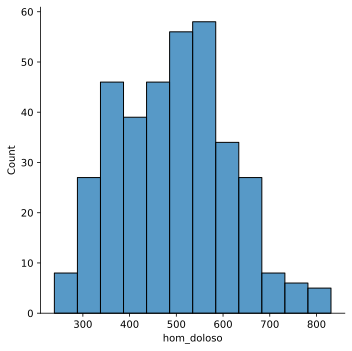

In [79]:
#Plotando um histograma de homicídio doloso
sns.displot(data=df, x="hom_doloso");

A partir do histograma é possível extrair algumas informações valiosas como os valores nos extremos ocorrem poucas vezes e conseguimos avaliar o intervalo de quantidade de crimes que ocorre com maior frequência.

O próximo passo é plotar a evolução do homícidio doloso ao longo dos anos.

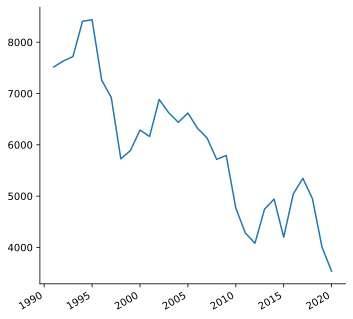

In [87]:
#Armazenando os valores "ano" em uma variável
ano = df.groupby("ano")['hom_doloso'].sum().index.to_list()

#Armazenando os totais de homicídios dolosos em uma variável
hom_doloso = df.groupby("ano")['hom_doloso'].sum().to_list()

#Plotando o gráfico de linha
grafico_linha = sns.relplot(x=ano, y=hom_doloso, kind="line")
grafico_linha.fig.autofmt_xdate()

O resultado mostra uma evolução bastante positiva em relação aos crimes associados ao homicídio doloso, trazendo um resultado surpreendente para o ano de 2020, se tornando a maior baixa histórica desde 1991.

## Conclusão



Os dados extraídos do ISP tiveram que ser tratados em função de algumas variáveis virem do tipo texto, necessitando de sua conversão para valores numéricos. É importante ressaltar que o dicionário disponibilizado pelo orgão mencionado é bem detalhista e nos ajuda a entender sobre os dados ausentes.

A base de dados é bem extensa e permite uma série de análises com o mais variado tipos de crimes, podendo até mesmo cruzar com outros dados como desemprego e educação para realizar uma análise mais robusta.

Em relação a análise dos dados, conseguimos avaliar que 43% dos veículos furtados e roubados são recuperados. Mas, os resultados mais surpreendentes estão associados a variável homicídio doloso que mostrou uma evolução anual com tendência de baixa, chegando em uma mínima histórica em 2020. Isto é um ponto positivo para a política de segurança pública do estado do Rio de Janeiro.


